In [2]:
import os
import pandas as pd
import numpy as np

In [34]:


# Read in the data
path = r'C:\Users\juan\My Drive\AAUniversidad\AAsignaturas\Third Year\BCSAI_22_23_THIRD__Q2\AI STATISTICAL LEARNING & PREDICTION\Group_project/all_pairs'

# Create a list of all csv files in the folder
files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Add to each csv a column with the name of the file
for f in files:
    df = pd.read_csv(os.path.join(path, f))
    df['file'] = f
    df.to_csv(os.path.join(path, f), index=False)

# # concatenate all csv files into one dataframe
df = pd.concat([pd.read_csv(os.path.join(path, f)) for f in files], ignore_index=True)
df



,Unnamed: 0.1,Unnamed: 0,campo,x,y,w,h,text,file
0,0,0,fecha,42,106,156,21,2/7/2012,parte_amistoso_0_23_3.csv
1,1,1,hora,224,105,83,22,17:38,parte_amistoso_0_23_3.csv
2,2,2,localizacion pais,352,104,64,14,Espana,parte_amistoso_0_23_3.csv
3,3,3,danos_materiales objetos si,378,186,14,15,X,parte_amistoso_0_23_3.csv
4,4,4,danos_materiales vehículos no,89,189,16,13,X,parte_amistoso_0_23_3.csv
...,...,...,...,...,...,...,...,...,...
683377,302,302,texto maquina,707,934,24,19,NaN,parte_amistoso_9_9_9.csv
683378,303,303,texto maquina,467,980,22,17,NaN,parte_amistoso_9_9_9.csv
683379,304,304,texto maquina,495,985,210,15,NaN,parte_amistoso_9_9_9.csv
683380,305,305,texto maquina,538,1000,123,19,NaN,parte_amistoso_9_9_9.csv


In [35]:
# Read in the first csv file
# df = pd.read_csv(os.path.join(path, files[0]))
df = df.dropna()

# Transform the unique values in the column 'campo' into columns and add the values of the column 'text' to the row, and merge all the rows with the same 'campo' value
df_ = df.pivot(index='file', columns='campo', values='text').reset_index()
df_

campo,file,A aseguradora agencia,A aseguradora agencia direccion,A aseguradora agencia nombre,A aseguradora carta_verde,A aseguradora carta_verde_desde,A aseguradora carta_verde_hasta,A aseguradora danos_propios_no,A aseguradora danos_propios_si,A aseguradora num_poliza,...,danos_materiales objetos si,danos_materiales vehiculos si,danos_materiales vehículos no,fecha,hora,localizacion pais,lugar,testigos,victimas no,victimas si
0,parte_amistoso_0_23_3.csv,Canet d'en berenguer,C/ aguilera 100,Irene,75114,1/17,5/12,X,X,2271,...,X,X,X,2/7/2012,17:38,Espana,San vicente de la sonsierra,"Veronica dominguez, 6592871886",X,
1,parte_amistoso_1_19_3.csv,Villava,Calle Serrano 9,Maria Isabel,95916,6/5,2/30,X,X,7746,...,,,X,14/1/1980,06:56,Inglaterra,Gallocanta,"Juana Esteban, 6551789482",,X
2,parte_amistoso_1_20_3.csv,Villava,Calle Serrano 9,Maria Isabel,95916,6/5,2/30,X,X,7746,...,,,X,14/1/1980,06:56,Inglaterra,Gallocanta,"Juana Esteban, 6551789482",,X
3,parte_amistoso_1_23_3.csv,Villava,Calle Serrano 9,Maria Isabel,95916,6/5,2/30,X,X,7746,...,,,X,14/1/1980,06:56,Inglaterra,Gallocanta,"Juana Esteban, 6551789482",,X
4,parte_amistoso_1_26_3.csv,Villava,Calle Serrano 9,Maria Isabel,95916,6/5,2/30,X,X,7746,...,,,X,14/1/1980,06:56,Inglaterra,Gallocanta,"Juana Esteban, 6551789482",,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,parte_amistoso_9_9_21.csv,RETORTILLO,C/ CRESPO 43,JOSE ANTONIO,8544,10/3,5/16,X,,4232,...,,X,,23/8/2022,06:14,ESPANA,HIGUERA DE CALATRAVA,"SERGIO TORRES, 6186486572",,
2222,parte_amistoso_9_9_3.csv,LA JONQUERA,C/ GALLARDO 63,CONSUELO,43413,9/1,6/22,X,X,308,...,X,,X,5/10/1989,02:20,ESPANA,FUENTELCESPED,"ANTONIA SUAREZ, 6750624968",X,X
2223,parte_amistoso_9_9_6.csv,Castillejo de martin viejo,Calle alonso 82,Nerea,66182,5/18,1/14,,,1814,...,,,,17/11/2013,23:05,Espana,Leganiel,"Dolores jimenez, 6903999764",,X
2224,parte_amistoso_9_9_7.csv,Goni,Calle manzano 90,Maria jesus,85345,7/20,5/19,,,3747,...,,X,,2/8/2014,09:51,Espana,Pozo de urama,"Felipe garrido, 6126860089",,


In [43]:
# Find the count of duplicated rows
print("The number of duplicated rows is: ", df_.drop(columns=['file']).duplicated().sum(), ". The % of duplicated rows is: ", df_.drop(columns=['file']).duplicated().sum()/len(df_)*100, "%")

The number of duplicated rows is:  2162 . The % of duplicated rows is:  97.12488769092543 %


In [6]:
# Show all columns 
pd.set_option('display.max_columns', None)

In [47]:
# Drop the column 'file' and drop duplicates
dff = df_.drop(columns=['file']).drop_duplicates()

# Save the dataframe as a xlsx file
dff.to_excel(r'C:\Users\juan\My Drive\AAUniversidad\AAsignaturas\Third Year\BCSAI_22_23_THIRD__Q2\AI STATISTICAL LEARNING & PREDICTION\Group_project/df.xlsx', index = False)

In [17]:
# unique values on campo column that have Nan values in the other columns
df[df.isnull().any(axis=1)].campo.unique()

array(['texto maquina'], dtype=object)

In [111]:
df = pd.read_excel(r'C:\Users\juan\My Drive\AAUniversidad\AAsignaturas\Third Year\BCSAI_22_23_THIRD__Q2\AI STATISTICAL LEARNING & PREDICTION\Group_project/df.xlsx')

In [118]:
df[:1]

,A aseguradora agencia,A aseguradora agencia direccion,A aseguradora agencia nombre,A aseguradora carta_verde,A aseguradora carta_verde_desde,A aseguradora carta_verde_hasta,A aseguradora danos_propios_no,A aseguradora danos_propios_si,A aseguradora num_poliza,A aseguradora pais,A aseguradora telefono,A aseguradora_nombre,A conductor apellidos,A conductor categoria,A conductor danos_apreciados,A conductor direccion,A conductor fecha_nac,A conductor nombre,A conductor pais,A conductor permiso,A conductor telefono,A conductor valido_hasta,A remolque matricula,A remolque pais,A vehiculo marca_modelo,A vehiculo matricula,A vehiculo pais,A 1,A 10,A 11,A 12,A 13,A 14,A 15,A 16,A 17,A 2,A 3,A 4,A 5,A 6,A 7,A 8,A 9,A asegurado apellidos,A asegurado codigo_postal,A asegurado direccion,A asegurado nombre,A asegurado pais,A asegurado telefono,A n_casillas,B 1,B 10,B 11,B 12,B 13,B 14,B 15,B 16,B 17,B 2,B 3,B 4,B 5,B 6,B 7,B 8,B 9,B asegurado apellidos,B asegurado codigo_postal,B asegurado direccion,B asegurado nombre,B asegurado pais,B asegurado telefono,B aseguradora agencia,B aseguradora agencia direccion,B aseguradora agencia nombre,B aseguradora agencia pais,B aseguradora carta_verde,B aseguradora carta_verde_desde,B aseguradora carta_verde_hasta,B aseguradora danos_propios no,B aseguradora danos_propios si,B aseguradora n_poliza,B aseguradora telefono,B aseguradora_nombre,B conductor apellidos,B conductor categoria,B conductor direccion,B conductor fecha_nac,B conductor nombre,B conductor pais,B conductor permiso,B conductor telefono,B conductor valido_hasta,B danos_apreciados,B n_casillas,B remolque matricula,B remolque pais,B vehiculo marca_modelo,B vehiculo matricula,B vehiculo pais,danos_materiales objetos no,danos_materiales objetos si,danos_materiales vehiculos si,danos_materiales vehículos no,fecha,hora,localizacion pais,lugar,testigos,victimas no,victimas si
0,Canet d'en berenguer,C/ aguilera 100,Irene,75114,1/17,5/12,X,X,2271,Espana,6113336419,Balumba,Contreras,B,Guantera quemado,C/ conde 66,27/8/1961,Victoria,Italia,16572018f,Conde.lidia@outlook.es,2/6/2019,6395xao,Espana,Mitsubishi compact,8386mgp,Espana,X,X,X,,X,X,,,,X,X,,X,,X,,X,Zamora,4028,C/ bermudez 97,Maria dolores,Francia,Plaza.ana maria@hotmail.es,3,X,,,,,X,X,X,X,X,X,X,,,X,,,Carrillo,94112,Calle ramirez 99,Hugo,Espana,6540063482,Iglesiarrubia,Calle de la fuente 84,Maria,Espana,19043,3/9,7/22,X,,5406,Izquierdo.antonia@hotmail.es,Caser,Aguilera,B,C/ guerra 85,15/9/1997,Carmen,Espana,20437005o,Beltran.gonzalo@gmail.es,2/2/2027,Sistema antibloqueo de ruedas desconchado,3,5558zue,Espana,Toyota f355,8933mnm,China,X,X,X,X,2/7/2012,17:38,Espana,San vicente de la sonsierra,"Veronica dominguez, 6592871886",X,


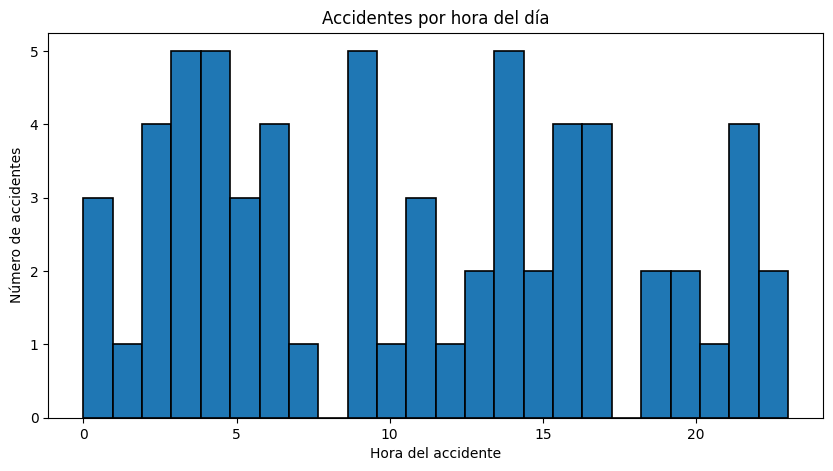

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
data = pd.read_excel(r'C:\Users\juan\My Drive\AAUniversidad\AAsignaturas\Third Year\BCSAI_22_23_THIRD__Q2\AI STATISTICAL LEARNING & PREDICTION\Group_project/df.xlsx')

# Crear una columna para la hora del accidente
data['hora'] = pd.to_datetime(data['hora'])
data['hora'] = data['hora'].apply(lambda x: x.hour)

# Crear el gráfico de barras
plt.figure(figsize=(10,5))
plt.hist(data['hora'], bins=24, edgecolor='black', linewidth=1.2)
plt.xlabel('Hora del accidente')
plt.ylabel('Número de accidentes')
plt.title('Accidentes por hora del día')
plt.show()


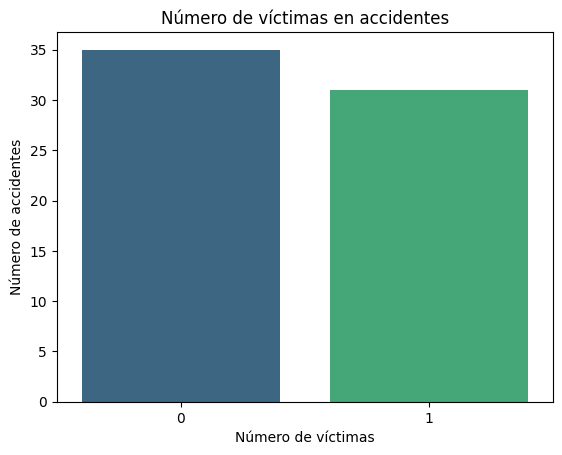

In [83]:
import seaborn as sns
import pandas as pd

# Cargar los datos
data = df.copy()

# Si la columna 'victimas si' tiene x o X en la celda, se cambia por 1
data['victimas si'] = data['victimas si'].apply(lambda x: 1 if x == 'x' or x == 'X' else 0)
data['victimas no'] = data['victimas no'].apply(lambda x: 0 if x == 'x' or x == 'X' else 1)


# Crear el gráfico de barras
sns.countplot(data=data, x='victimas si', palette='viridis')
sns.countplot(data=data, x='victimas no', palette='viridis')

plt.xlabel('Número de víctimas')
plt.ylabel('Número de accidentes')
plt.title('Número de víctimas en accidentes')
plt.show()


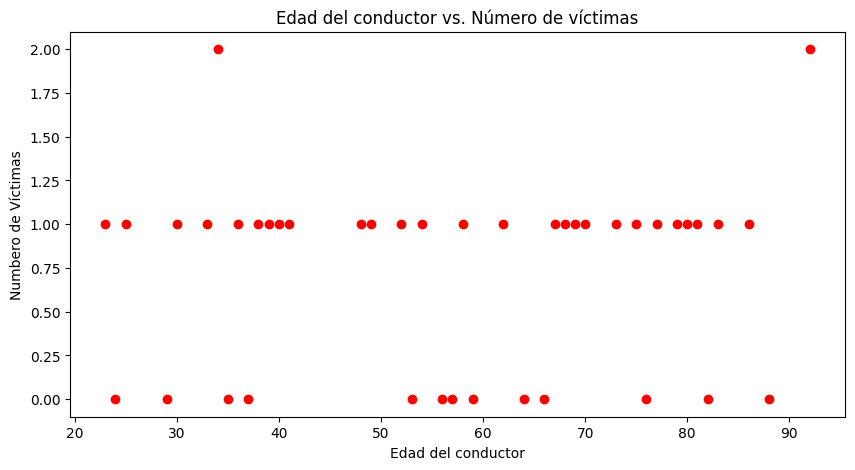

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
Age = data.copy()
Age['edad'] = Age["A  conductor fecha_nac"].apply(lambda x: int(x.split('/')[-1]))
# Edad del conductor con fecha de nacimiento
Age["A conductor edad"] = Age["edad"].apply(lambda x: 2023 - x)

# Group by 'A conductor edad' and sum the values of 'victimas si' y dividir por el total de accidentes
Age = Age.groupby('A conductor edad')[['victimas si', 'victimas no']]
# Age = Age.sum()/len(data)

Age.sum()
# Crear el diagrama de dispersión
plt.figure(figsize=(10,5))
plt.plot(Age.sum().index, Age.sum()['victimas si'], 'o', color='red')
plt.xlabel('Edad del conductor')
plt.ylabel('Numbero de Víctimas')
plt.title('Edad del conductor vs. Número de víctimas')
plt.show()


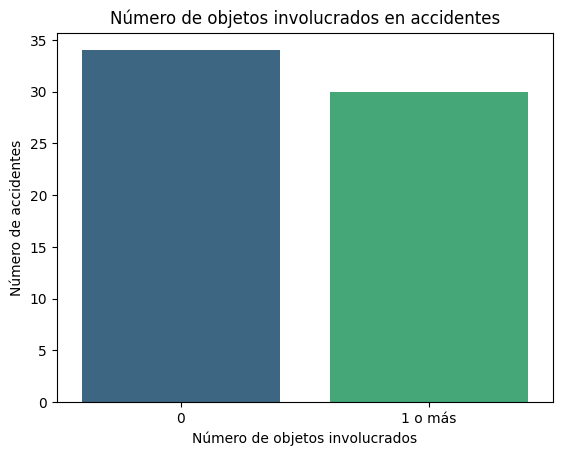

In [108]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = df.copy()

# Si la columna 'victimas si' tiene x o X en la celda, se cambia por 1
data['danos_materiales objetos'] = data['danos_materiales objetos si'].apply(lambda x: 1 if x == 'x' or x == 'X' else 0)
data['danos_materiales vehiculos'] = data['danos_materiales vehiculos si'].apply(lambda x: 1 if x == 'x' or x == 'X' else 0)

# Crear el gráfico de barras
sns.countplot(data=data, x='danos_materiales objetos', palette='viridis')

plt.xlabel('Número de objetos involucrados')
plt.ylabel('Número de accidentes')
plt.title('Número de objetos involucrados en accidentes')
plt.xticks([0, 1], ['0', '1 o más'])
plt.show()
